In [1]:
import sympy
from sympy import Matrix, Rational, sqrt, symbols, zeros, simplify, exp
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline


# Linear algebra
    
## Session 12:
    
## Gerhard Jäger
    
### January 25, 2024

## Orthogonal matrices

A matrix $Q$ is **orthogonal** iff 

- $Q$ is square
- $QQ^T = \mathbf I$

**Corroloaries**

If $Q$ is orthogonal, then

- for each column $\mathbf q_i$ of Q, $\|\mathbf q_i\| = 1$
- if $i\neq j$, then $\mathbf q_i$ and $\mathbf q_j$ are orthogonal, i.e., $\mathbf q_i^T\mathbf q_j = 0$
- $Q^T = Q^{-1}$

It follows from what has been said above that the eigenvectors of each symmetric matrix can be chosen so that they form an orthogonal matrix. Therefore, $S$ can be diagonalized as

$$
S = Q\Lambda Q^T
$$

where $Q$ is orthogonal and $\Lambda$ is diagonal.

This is the famous **Spectral Theorem**.

### Examples

$$
A = \begin{pmatrix}
1 & 2 \\
2 & 4
\end{pmatrix}
$$

1. find eigenvalues

$$
\begin{aligned}
(1-\lambda)(4-\lambda) - 4 &= 0\\
\lambda^2 - 5\lambda &= 0\\
\lambda (\lambda - 5) &= 0\\
\lambda_1 &= 5\\
\lambda_2 &= 0
\end{aligned}
$$

2. find eigenvectors
    - $\lambda_1 = 5$
        $$
        \begin{aligned}
        \mathbf x &= \begin{pmatrix}\frac{1}{2}\\1\end{pmatrix}\\
        \mathbf q_1 &= \frac{1}{\sqrt 5}\begin{pmatrix}1\\2\end{pmatrix}
        \end{aligned}
        $$
    - $\lambda_2 = 0$:
        $$
        \begin{aligned}
        \mathbf x &= \begin{pmatrix}-2\\1 \end{pmatrix}\\
        \mathbf q_2 &= 
        \frac{1}{\sqrt{5}}\begin{pmatrix}-2\\1 \end{pmatrix}
        \end{aligned}
        $$



3. combine eigenvectors into orthogonal matrix

    $$
    Q = \frac{1}{\sqrt 5}\begin{pmatrix}
    1 & -2\\
    2 & 1
    \end{pmatrix}
    $$
4. construct diagonal matrix from eigenvalues

    $$
    \Lambda = \begin{pmatrix}
    5 & 0\\
    0 & 0
    \end{pmatrix}
    $$

5. factorize $A$

    $$
    A = Q\Lambda Q^{-1}
    $$

In [2]:
A = Matrix([
    [1, 2],
    [2, 4]
])
A

Matrix([
[1, 2],
[2, 4]])

In [3]:
Q = Matrix([
    [1, -2],
    [2, 1]
])/sqrt(5)
Q

Matrix([
[  sqrt(5)/5, -2*sqrt(5)/5],
[2*sqrt(5)/5,    sqrt(5)/5]])

In [4]:
Q.inv()

Matrix([
[   sqrt(5)/5, 2*sqrt(5)/5],
[-2*sqrt(5)/5,   sqrt(5)/5]])

In [5]:
Lambda = Matrix([
    [5, 0],
    [0, 0]
])
Lambda

Matrix([
[5, 0],
[0, 0]])

In [6]:
Q * Lambda * Q.T

Matrix([
[1, 2],
[2, 4]])

### Example

$$
S = \begin{pmatrix}
2 & 2 & 2\\
2 & 0 & 0\\
2 & 0 & 0
\end{pmatrix}
$$

- find eigenvalues

$$
\begin{aligned}
(2-\lambda)(-\lambda^2) - 4(-\lambda) - 4(-\lambda) &= 0\\
\lambda^3 - 2\lambda^2-8\lambda &= 0\\
\lambda_1 &= 0\\
\lambda^2 - 2\lambda - 8 &= 0\\
\lambda_{2/3} &= 1 \pm \sqrt{9}\\
\lambda_2 &= 4\\
\lambda_3 &= -2
\end{aligned}
$$

It is good practice to order the eigenvalues in descending order, so let's say

$$
\begin{aligned}
\lambda_1 &= 4\\
\lambda_2 &= 0\\
\lambda_3 &= -2
\end{aligned}
$$

- find eigenvectors

    - $\lambda_1 = 4$
    
    $$
    \begin{pmatrix}
    -2 & 2 & 2\\
    2 & -4 & 0\\
    2 & 0 & -4
    \end{pmatrix}\\
    \mathbf q_1 = \frac{1}{\sqrt 6}\begin{pmatrix}
    2 \\1 \\ 1
    \end{pmatrix}
    $$
    
    - $\lambda_2 = 0$
    
    $$
    \begin{pmatrix}
    2 & 2 & 2\\
    2 & 0 & 0\\
    2 & 0 & 0
    \end{pmatrix}\\
    \mathbf q_2 = \frac{1}{\sqrt 2}\begin{pmatrix}
    0 \\-1 \\ 1
    \end{pmatrix}
    $$
    
    - $\lambda_3 = -2$
    
    $$
    \begin{pmatrix}
    4 & 2 & 2\\
    2 & 2 & 0\\
    2 & 0 & 2
    \end{pmatrix}\\
    \mathbf q_3 = \frac{1}{\sqrt 3}\begin{pmatrix}
    -1 \\1 \\ 1
    \end{pmatrix}
    $$
    

- construct transformation matrix

$$
Q = \begin{pmatrix}
\frac{2}{\sqrt 6} & 0 & -\frac{1}{\sqrt 3}\\
\frac{1}{\sqrt 6} & -\frac{1}{\sqrt 2} & \frac{1}{\sqrt 3}\\
\frac{1}{\sqrt 6} & \frac{1}{\sqrt 2} & \frac{1}{\sqrt 3}\\
\end{pmatrix}
$$

- construct diagonal matrix

$$
\Lambda = \begin{pmatrix}
4 & 0 & 0\\
0 & 0 & 0\\
0 & 0 & -2
\end{pmatrix}
$$

- factorize matrix

$$
S = Q\Lambda Q^T
$$

## Positive definite matrices

Remember from a few weeks back (Notebook 4):

#### Definition

A matrix $S$ is **positive definite** if and only if for all vectors $\mathbf x \neq \mathbf 0$:
$$
    \mathbf x' S \mathbf x > 0
$$

Using factorization $S = Q \Lambda Q'\\$, this is equivalent to

$$
\mathbf x' Q \Lambda Q' \mathbf x > 0
$$

Let us say $\mathbf y = Q'\mathbf x$. It then follows that

- $S$ is positive definite iff $S = Q\Lambda Q'$ and for all $\mathbf y: \mathbf y'\Lambda \mathbf y > 0$

The latter statement is equivalent to

$$
\forall \mathbf y:\sum_i \lambda_i y_i^2 > 0
$$
This holds if and only if $\forall i:\lambda_i > 0$.

**Theorem** 

A symmetric matrix $S$ is positive definite iff all eigenvectors of $S$ are positive.


Likewise, a symmetric matrix is **positive semidefinite** iff all its eigenvectors are $\geq 0$.

Consider some rectangular matrix $A$.

$AA'$ is symmetric. Let $\lambda$ be an eigenvalue of $AA'$. So there is a unit eigenvector $\mathbf q$ with

$$
\begin{aligned}
A A' \mathbf q &= \lambda \mathbf q\\
\mathbf q' AA' \mathbf q &= \lambda \mathbf q'\mathbf q\\
(A'\mathbf q)'(A'\mathbf q) &= \lambda \mathbf q'\mathbf q\\
\|A'\mathbf q\|^2 &= \lambda\|\mathbf q\|^2\\
\|\mathbf q\| &= 1\\
\|A'\mathbf q\|^2 &= \lambda\\
\lambda &\geq 0
\end{aligned}
$$

**Theorem**

For each matrix $A$, $AA'$ is positive semidefinite.

On the other hand, every positive semidefinite matrix can be factorized int $LL'$ via Cholesky decomposition.

$S$ is positive semidefinit iff there is an $A$ with $S = AA'$.

<img src="_img/table_eigenvalues.png" width=1200>

# Principal Component Analysis

## Variance and covariance


## Overview

The **Iris dataset** is a classic dataset in the field of machine learning and statistics. It's often used for demonstrating various data analysis techniques, especially for classification tasks.

---

## Dataset Description

- **Origin**: Introduced by the British statistician and biologist Ronald Fisher in 1936.
- **Content**: Comprises 150 samples from three species of Iris (Iris setosa, Iris virginica, and Iris versicolor).
- **Features**:
  - Sepal Length (cm)
  - Sepal Width (cm)
  - Petal Length (cm)
  - Petal Width (cm)
- **Target**: Species of Iris
  - Setosa
  - Versicolor
  - Virginica



## Objectives

1. **Data Visualization**: Explore the dataset through visual methods to understand the relationship between different features and species.
2. **Dimensionality Reduction**: Use techniques like PCA (Principal Component Analysis) to reduce feature dimensions and visualize the data in 2D or 3D.
3. **Classification**: Apply machine learning models to classify the species of Iris based on the given features.

---

## Importance

- **Educational Value**: Ideal for beginners to learn data preprocessing, visualization, and machine learning techniques.
- **Benchmarking**: Serves as a benchmark for testing new classification algorithms.


In [7]:
import pandas as pd
from sklearn.datasets import load_iris
import seaborn as sns


In [8]:
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

In [9]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [10]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


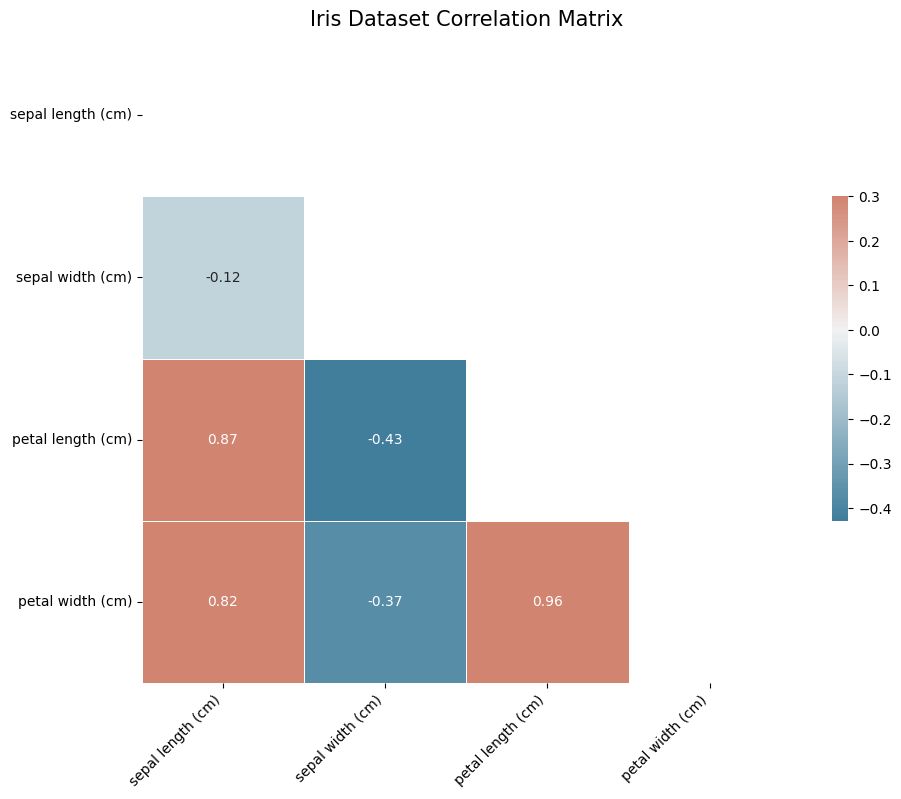

In [11]:
correlation_matrix = iris_df.drop('species', axis=1).corr()
plt.figure(figsize=(10, 8))

# Mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Choose a diverging color map
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            annot=True, fmt='.2f', square=True, linewidths=.5,
            cbar_kws={"shrink": .5})

# Adjust the font size for readability
sns.set(font_scale=1.25)

# Ensure the labels are readable
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Adjust layout
plt.tight_layout()

# Add title
plt.title('Iris Dataset Correlation Matrix')

# Show the plot
plt.show()

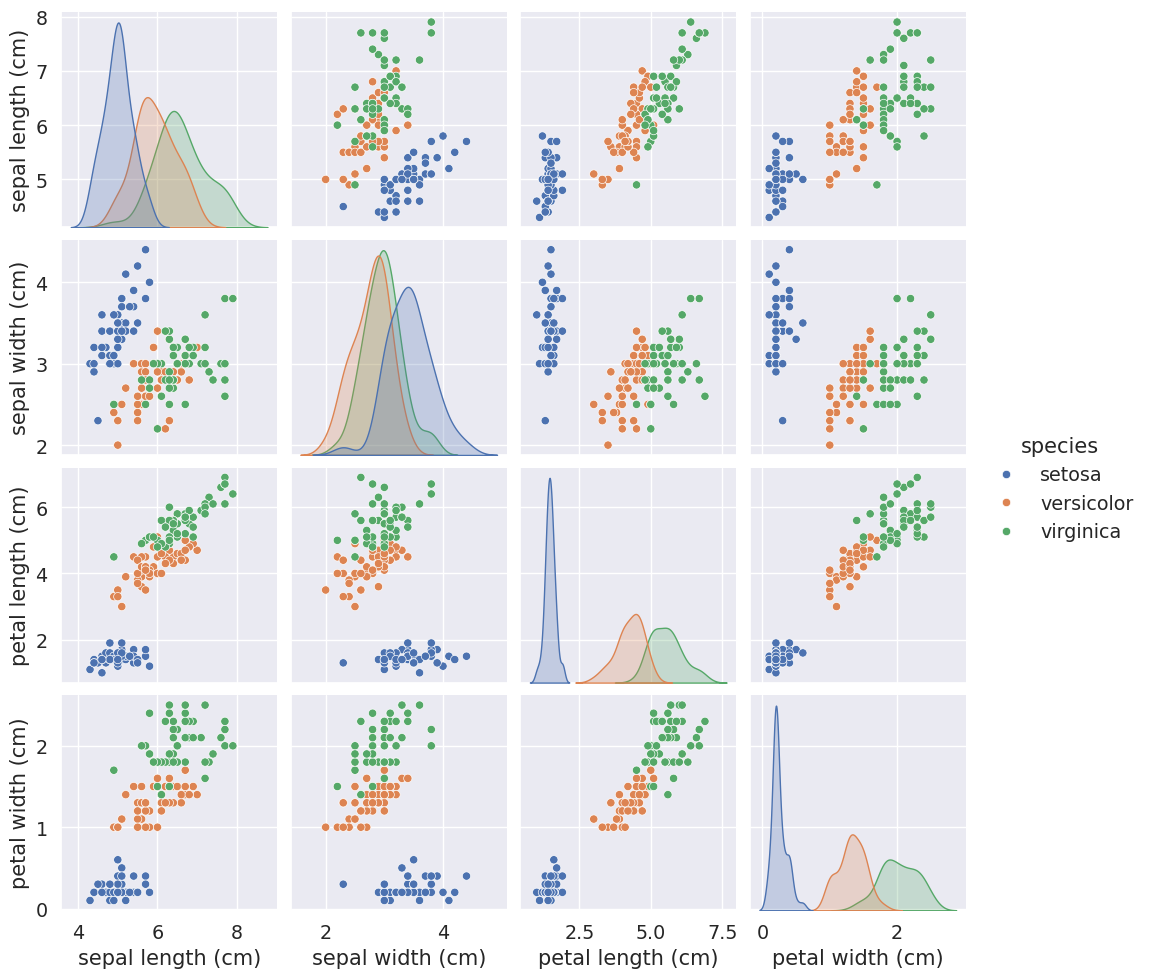

In [12]:
sns.pairplot(iris_df,hue='species')

For two stochastic variables $x$ and $y$, the **covariance** between $x$ and $y$ is defined as

$$
\mathrm{cov}(x, y) = E(xy) - E(x)E(y)
$$

The **variance** of a stochastic variable $x$ is its covariance with itself

$$
\begin{aligned}
\mathrm{var}(x) &= \mathrm{cov}(x,x)\\
&= E(x^2) - (E(x))^2
\end{aligned}
$$

- The variance is always non-negative.
- If $\mathrm{var}=0$, $x$ is a deterministic variable.

In empirical work, we do not know the probability function of $x$ and $y$ exactly; we only have finite samples. 

Let us assume that the *petal length* is variable $x$ and *petal width* are $y$. We have two vectors $\mathbf x$ and $\mathbf y$ as finite samples.

In [13]:
x = iris_df.values[:,0].astype(float)
x

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
       5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
       6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
       6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
       6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
       6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3,
       6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5,
       7.7, 7.7, 6. , 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2,
       7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6. , 6.9, 6.7, 6.9, 5.8,
       6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9])

In [14]:
y = iris_df.values[:,3].astype(float)
y

array([0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.3, 0.2, 0.2, 0.1, 0.2, 0.2, 0.1,
       0.1, 0.2, 0.4, 0.4, 0.3, 0.3, 0.3, 0.2, 0.4, 0.2, 0.5, 0.2, 0.2,
       0.4, 0.2, 0.2, 0.2, 0.2, 0.4, 0.1, 0.2, 0.2, 0.2, 0.2, 0.1, 0.2,
       0.2, 0.3, 0.3, 0.2, 0.6, 0.4, 0.3, 0.2, 0.2, 0.2, 0.2, 1.4, 1.5,
       1.5, 1.3, 1.5, 1.3, 1.6, 1. , 1.3, 1.4, 1. , 1.5, 1. , 1.4, 1.3,
       1.4, 1.5, 1. , 1.5, 1.1, 1.8, 1.3, 1.5, 1.2, 1.3, 1.4, 1.4, 1.7,
       1.5, 1. , 1.1, 1. , 1.2, 1.6, 1.5, 1.6, 1.5, 1.3, 1.3, 1.3, 1.2,
       1.4, 1.2, 1. , 1.3, 1.2, 1.3, 1.3, 1.1, 1.3, 2.5, 1.9, 2.1, 1.8,
       2.2, 2.1, 1.7, 1.8, 1.8, 2.5, 2. , 1.9, 2.1, 2. , 2.4, 2.3, 1.8,
       2.2, 2.3, 1.5, 2.3, 2. , 2. , 1.8, 2.1, 1.8, 1.8, 1.8, 2.1, 1.6,
       1.9, 2. , 2.2, 1.5, 1.4, 2.3, 2.4, 1.8, 1.8, 2.1, 2.4, 2.3, 1.9,
       2.3, 2.5, 2.3, 1.9, 2. , 2.3, 1.8])

The means $E(x)$ and $E(y)$ are estimated as the average.
Let $\mathbf 1$ be a vector of length $n$, where $n$ is the length of $x$ and $y$, filled with 1s.

$$
\begin{aligned}
    E(x) &\approx \frac{\sum_i x_i}{n}\\
    &= (\mathbf 1'\mathbf 1)^{-1} \mathbf 1'\mathbf x
\end{aligned}
$$

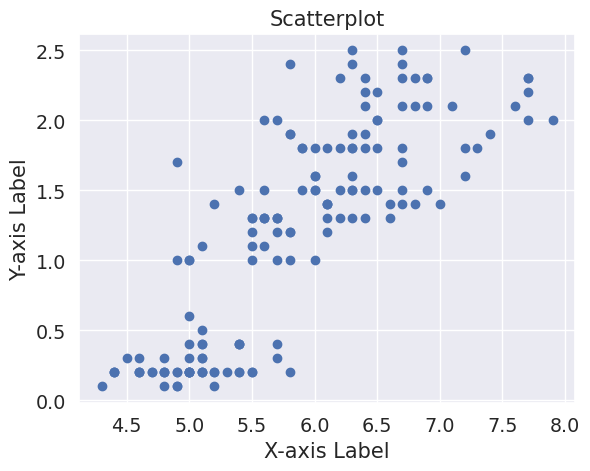

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(x, y)
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Scatterplot')
plt.show()

In [16]:
mu_x = x.mean()
mu_x

5.843333333333334

In [17]:
mu_y = y.mean()
mu_y

1.1993333333333336

In [18]:
(x*y).mean() - mu_x * mu_y

0.5128288888888868

Computations become easier if we *center* the vectors, i.e., subtract the mean from each entry.

$$
\begin{aligned}
\mathbf x  &:= \mathbf x - \mathbf x \mathbf x'\mathbf 1 (\mathbf 1' \mathbf 1)^{-1}\\
\mathbf y  &:= \mathbf y - \mathbf x \mathbf x'\mathbf 1 (\mathbf 1' \mathbf 1)^{-1}\\
\end{aligned}
$$

Then we get

$$
\mathrm{cov}(x, y) \approx \frac{1}{n} \mathbf x'\mathbf y
$$

We can do this with more than two variables. Suppose $X$ is a matrix with variables as rows and observations as columns.

The **total variance** of a matrix is the sum of the variances of its columns.

$$
\text{total_variance} = \sum_i \text{var}(X_{\_, i})
$$



To make life simpler, we center the columns.

In [19]:
X = iris_df.values[:,:-1].astype(float)
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [20]:
X = X - X.mean(axis=0)
X

array([[-7.43333333e-01,  4.42666667e-01, -2.35800000e+00,
        -9.99333333e-01],
       [-9.43333333e-01, -5.73333333e-02, -2.35800000e+00,
        -9.99333333e-01],
       [-1.14333333e+00,  1.42666667e-01, -2.45800000e+00,
        -9.99333333e-01],
       [-1.24333333e+00,  4.26666667e-02, -2.25800000e+00,
        -9.99333333e-01],
       [-8.43333333e-01,  5.42666667e-01, -2.35800000e+00,
        -9.99333333e-01],
       [-4.43333333e-01,  8.42666667e-01, -2.05800000e+00,
        -7.99333333e-01],
       [-1.24333333e+00,  3.42666667e-01, -2.35800000e+00,
        -8.99333333e-01],
       [-8.43333333e-01,  3.42666667e-01, -2.25800000e+00,
        -9.99333333e-01],
       [-1.44333333e+00, -1.57333333e-01, -2.35800000e+00,
        -9.99333333e-01],
       [-9.43333333e-01,  4.26666667e-02, -2.25800000e+00,
        -1.09933333e+00],
       [-4.43333333e-01,  6.42666667e-01, -2.25800000e+00,
        -9.99333333e-01],
       [-1.04333333e+00,  3.42666667e-01, -2.15800000e+00,
      

In [21]:
(X.T @ X) / X.shape[0]

array([[ 0.68112222, -0.04215111,  1.26582   ,  0.51282889],
       [-0.04215111,  0.18871289, -0.32745867, -0.12082844],
       [ 1.26582   , -0.32745867,  3.09550267,  1.286972  ],
       [ 0.51282889, -0.12082844,  1.286972  ,  0.57713289]])

This is called the **variance-covariance matrix** (often called $\Sigma$).



On the diagonal are the variances of the variables, and the off-diagonal cells contain the covariances between different variables.

If the columns of $X$ are centered,

$$
\Sigma = \frac{1}{n} X'X
$$


The total variance of $X$ is the sum of the diagonal elements of $\Sigma$.

$$
\text{total_variance} = \sum_i \Sigma_{i,i}
$$

The sum of the diagonal entries of a square matrix is also called the **trace** of the matrix.

**Fun fact:** The trace of a square matrix is always identical to the sum of the eigenvectors, repeated according to algebraic multiplicity.


# Dimensionality reduction


## What is Dimensionality Reduction?

- **Dimensionality Reduction** is a technique used in machine learning and statistics to reduce the number of input variables in a dataset.
- It is particularly useful for datasets with a high number of dimensions (features).
- The primary goals are to simplify the model, reduce computational costs, and minimize the “curse of dimensionality”.

**Key Benefits:**
- Improves model performance by eliminating redundant or irrelevant features.
- Reduces overfitting risk.
- Enhances data visualization.

# Techniques of Dimensionality Reduction

## Principal Component Analysis (PCA)

- PCA is a linear transformation technique used to identify strong patterns in data.
- It transforms the data into a new coordinate system, reducing the number of dimensions without significant loss of information.

## t-Distributed Stochastic Neighbor Embedding (t-SNE)

- t-SNE is a non-linear technique particularly well-suited for the visualization of high-dimensional datasets.
- It reduces dimensionality while keeping similar instances close and dissimilar instances apart.

## Others

- Linear Discriminant Analysis (LDA)
- Autoencoders (for deep learning approaches)
- Feature selection methods (e.g., backward elimination, forward selection).


# Considerations in Dimensionality Reduction

## Choosing the Right Technique

- The choice of technique depends on the nature of the data and the specific requirements of the task.
- PCA is often preferred for linear data, while t-SNE is chosen for complex, non-linear data patterns.

## Data Preprocessing

- Normalizing or standardizing data is crucial before applying dimensionality reduction techniques.
- It ensures that features with larger scales do not dominate the results.

## Interpretability

- While dimensionality reduction can simplify data, it can also make the results harder to interpret.
- It's important to balance between reducing dimensions and maintaining interpretability for meaningful insights.


Suppose we have an $m$-directional vector unit $\mathbf v$ ($m$ being the number of columns of $X$), and we project all rows in $X$ onto $\mathbf v$.

This give us a matrix $X_v$ where all rows are multiples of $\mathbf v$.


$$
\begin{aligned}
X_v &= X \mathbf v(\mathbf v^T\mathbf v)^{-1}\mathbf v'\\
&= X\mathbf v\mathbf v'
\end{aligned}
$$

Let us check whether $X_v$ is centered.

$$
\begin{aligned}
\mathbf 1' X_v &= \mathbf 1' X\mathbf v \mathbf v'\\
&= \mathbf 0'\mathbf v \mathbf v'\\
&=\mathbf 0'
\end{aligned}
$$

Let us calculate the total variance of $X_v$.

$$
\begin{aligned}
\text{var}(X_v) &= \frac{1}{n}\sum_i(X_v'X)_{i,i}\\
&= \frac{1}{n}\sum_i\sum_j((x_v)_{j,i})^2\\
&= \frac{1}{n}\sum_{i,j}((X\mathbf v\mathbf v')_{j,i})^2\\
&= \frac{1}{n}\sum_{i,j}((X\mathbf v)_{j} v_{i})^2\\
&= \frac{1}{n}\sum_iv_i^2\sum_j((X\mathbf v)_{j})^2\\
&=\frac{1}{n}\|\mathbf v\|^2 \|X\mathbf v\|^2\\
&=\frac{1}{n}\|X\mathbf v\|^2
\end{aligned}
$$


We want to find the unit vector $\mathbf v$ that maximizes the total variance of $X_v$.

Since $X'X$ is symmetric and positive semi-definite, there is an orthogonal matrix $Q$ and a non-negative diagonal matrix $\Lambda$ with

$$
X'X = Q\Lambda Q'
$$

We assume that the diagonal entries of $\Lambda$ are ordered in descending order.

So we have

$$
\begin{aligned}
\arg\max_{\mathbf v} \text{var}(X_v) &= \arg\max_{\mathbf v} \frac{1}{n}\|X\mathbf v\|^2\\
&=\arg\max_{\mathbf v} \|X\mathbf v\|^2\\
&=\arg\max_{\mathbf v} \mathbf v' X'X\mathbf v\\
&=\arg\max_{\mathbf v} \mathbf v' Q\lambda Q'\mathbf v\\
\end{aligned}
$$



Let us define $\mathbf w = Q'\mathbf v$. Since $Q$ is orthogonal, we also have $\mathbf v=Q\mathbf w$.

$$
\begin{aligned}
\max_{\mathbf v} \text{var}(X_v) &= \max_{\mathbf w}\mathbf w'\Lambda \mathbf w\\
&= \max_{\mathbf w}\sum_i \lambda_i w_i^2
\end{aligned}
$$

$\mathbf w$ is a unit vector, i.e., $\sum_iw_i^2 = 1$. Also, $\forall i, w_i^2\leq 1$. Therefore, the vector $\mathbf w$ maximizing $\sum_i \lambda_i w_i^2$ is the vector with 1 in the first cell and 0 everywhere else.

$$
\mathbf w^* = \begin{pmatrix}1 \\ 0 \\ \vdots \\ 0\end{pmatrix}
$$

It follows that 

$$
\mathbf v^* = \mathbf q_1
$$

The data in $X$ have most variance along the eigenvector of $X'X$ corresponding to the largest eigenvalue. 


In [25]:
q1 = np.linalg.eig(X.T @ X)[1][:,0]
q1

array([ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ])

In [23]:
Xv = X @ q1.reshape(-1,1) * q1.reshape(1, -1)
Xv

array([[-9.70007012e-01,  2.26869046e-01, -2.29941153e+00,
        -9.61693216e-01],
       [-9.80854414e-01,  2.29406079e-01, -2.32512540e+00,
        -9.72447646e-01],
       [-1.04404246e+00,  2.44184746e-01, -2.47491330e+00,
        -1.03509411e+00],
       [-9.92130098e-01,  2.32043280e-01, -2.35185453e+00,
        -9.83626688e-01],
       [-9.86121569e-01,  2.30637982e-01, -2.33761125e+00,
        -9.77669657e-01],
       [-8.24272089e-01,  1.92783990e-01, -1.95394540e+00,
        -8.17207367e-01],
       [-1.01930452e+00,  2.38398942e-01, -2.41627178e+00,
        -1.01056821e+00],
       [-9.49053581e-01,  2.21968375e-01, -2.24974121e+00,
        -9.40919374e-01],
       [-1.04310002e+00,  2.43964325e-01, -2.47267924e+00,
        -1.03415975e+00],
       [-9.65898108e-01,  2.25908040e-01, -2.28967133e+00,
        -9.57619529e-01],
       [-9.05977065e-01,  2.11893471e-01, -2.14762788e+00,
        -8.98212060e-01],
       [-9.44214708e-01,  2.20836641e-01, -2.23827061e+00,
      

In [30]:
(Xv.T @ Xv).trace() / Xv.shape[0]

4.200053427994631

In [104]:
X1_df = pd.DataFrame(Xv)
X1_df["species"] = iris_df["species"]
X1_df.columns = iris_df.columns
X1_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,-0.970007,0.226869,-2.299412,-0.961693,setosa
1,-0.980854,0.229406,-2.325125,-0.972448,setosa
2,-1.044042,0.244185,-2.474913,-1.035094,setosa
3,-0.992130,0.232043,-2.351855,-0.983627,setosa
4,-0.986122,0.230638,-2.337611,-0.977670,setosa
...,...,...,...,...,...
145,0.702575,-0.164321,1.665462,0.696554,virginica
146,0.551898,-0.129080,1.308279,0.547167,virginica
147,0.637611,-0.149127,1.511463,0.632146,virginica
148,0.686975,-0.160672,1.628481,0.681087,virginica


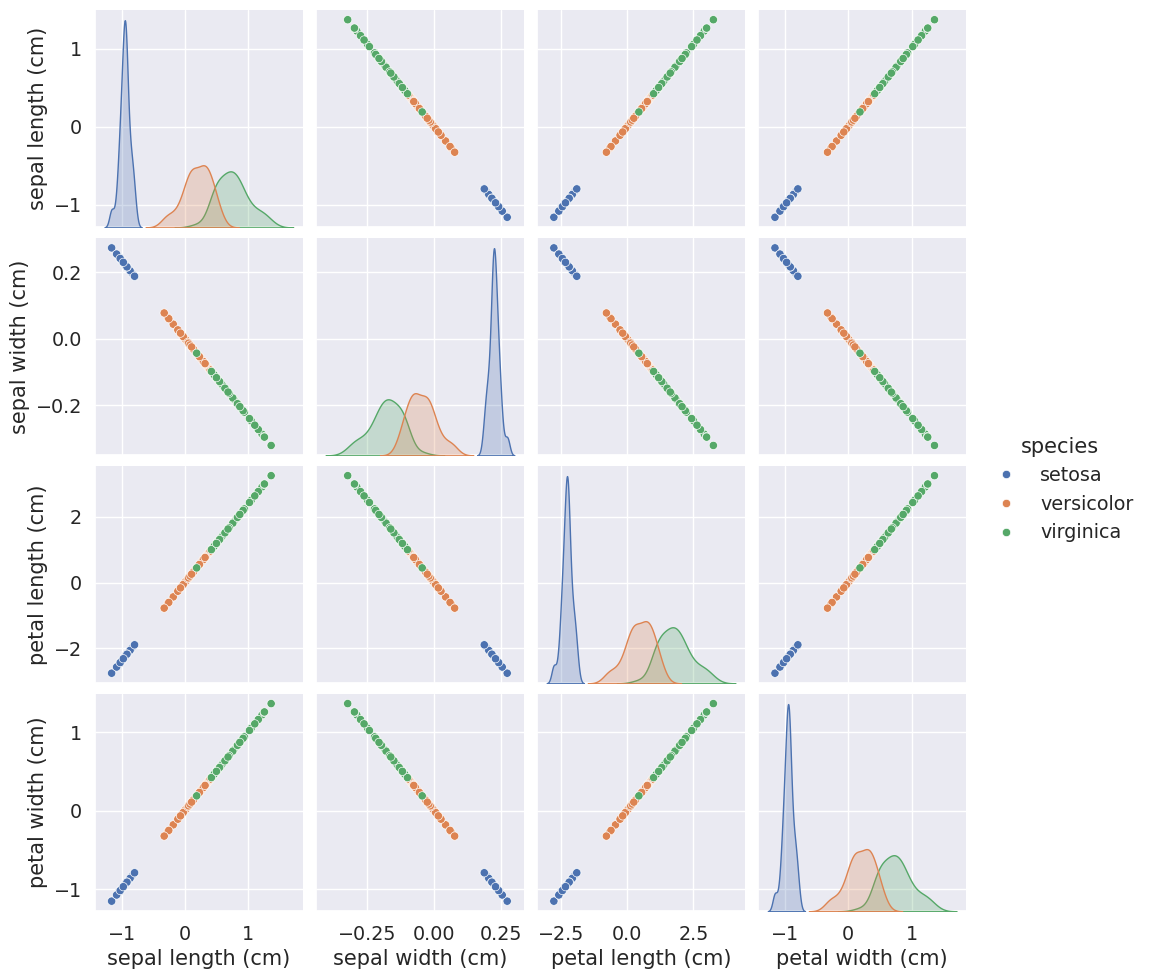

In [105]:
sns.pairplot(X1_df,hue='species')

We can also choose $Q$ as new basis of the coordinate system.

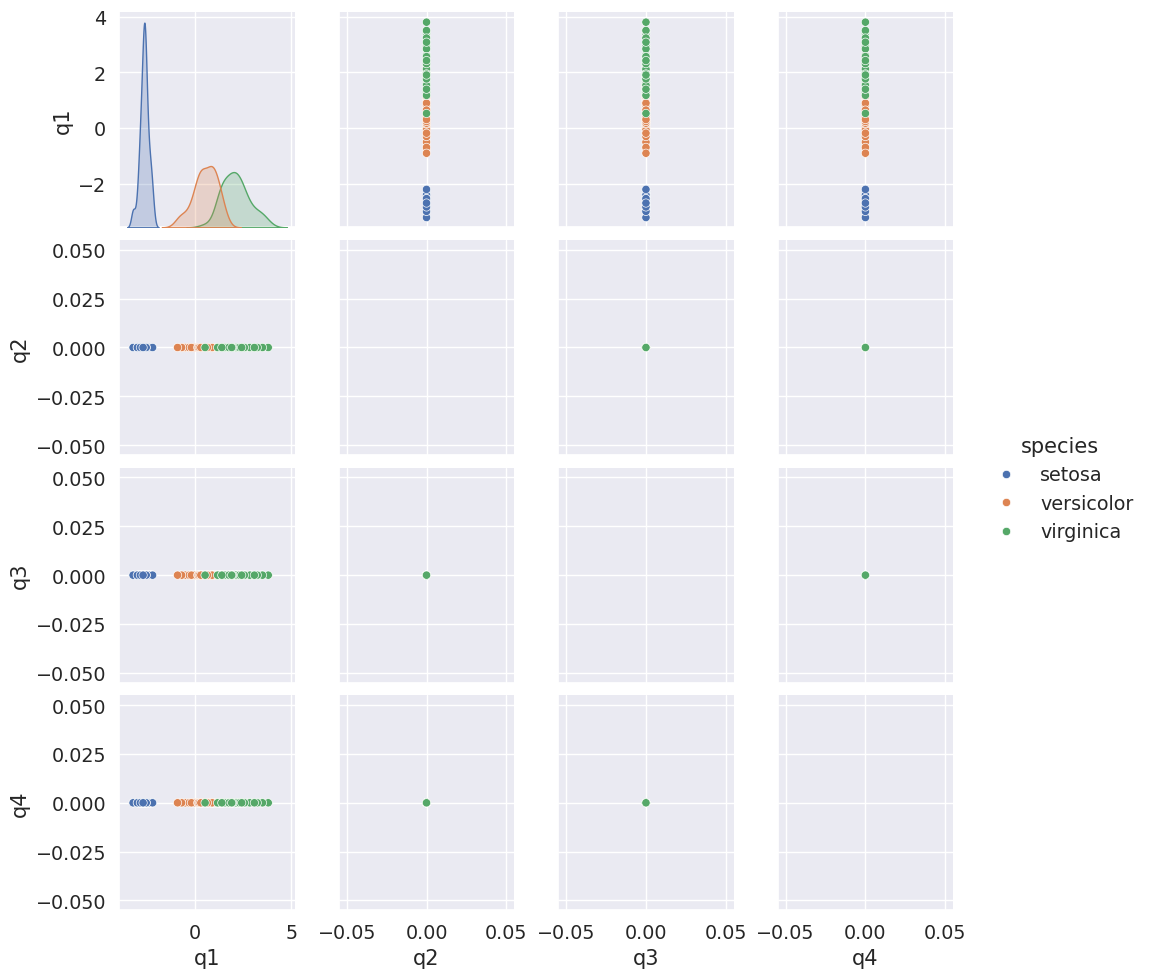

In [109]:
X1_rotated = Xv @ Q
X1_rotated_df = pd.DataFrame(X1_rotated)
X1_rotated_df
X1_rotated_df.columns = ["q1", "q2", "q3", "q4"]
X1_rotated_df["species"] = iris_df["species"]
sns.pairplot(X1_rotated_df.round(2),hue='species')

The remaining information in the original data is represented by the projection of $X$ onto the orthogonal complement of $\mathbf q_1$.

$$
X_{-1} = X - X\mathbf q_1\mathbf q_1'
$$

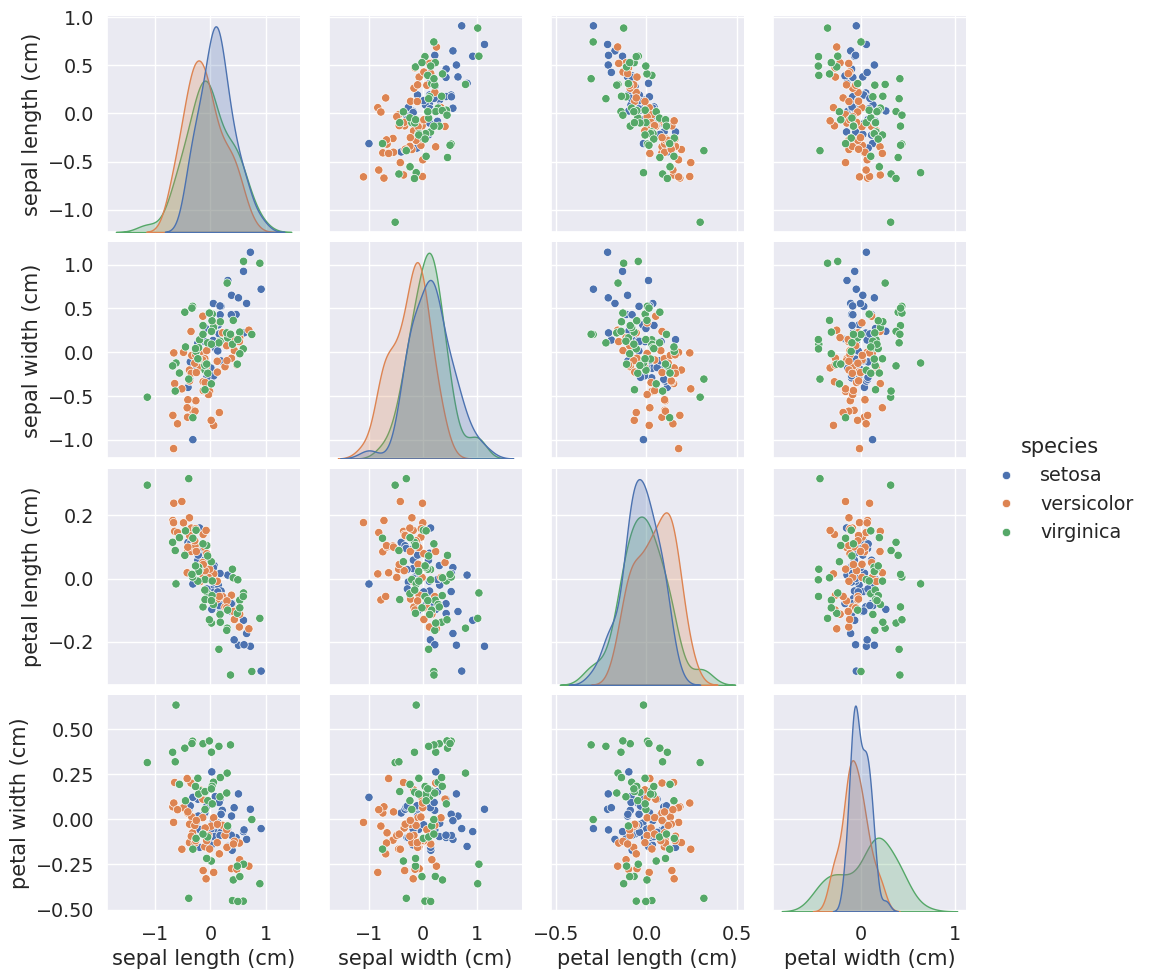

In [110]:
X_without1 = X - Xv
X_without1_df = pd.DataFrame(X_without1)
X_without1_df["species"] = iris_df["species"]
X_without1_df.columns = iris_df.columns
sns.pairplot(X_without1_df,hue='species')

$X_{-1}'X_{-1}$ has the same eigenvectors as $X'X$:

- $\mathbf q_1$ is an eigenvector with eigenvalue 0

$$
\begin{aligned}
X_{-1}'X_{-1}\mathbf q_1 &= (X-Xv)'(X-X_v)\mathbf q_1\\
&=(X-X\mathbf q_1\mathbf q_1')'(X-X\mathbf q_1\mathbf q_1')\mathbf q_1\\
&=(X'-\mathbf q_1\mathbf q_1'X')(X-X\mathbf q_1\mathbf q_1')\mathbf q_1\\
&=(X'X - X'X\mathbf q_1\mathbf q_1' - \mathbf q_1\mathbf q_1'X'X + \mathbf q_1\mathbf q_1'X'X\mathbf q_1\mathbf q_1')\mathbf q_1\\
&= (Q\Lambda Q' - Q\Lambda Q'\mathbf q_1\mathbf q_1' - \mathbf q_1\mathbf q_1'Q\lambda Q' + \mathbf q_1\mathbf q_1'Q\Lambda Q'\mathbf q_1\mathbf q_1')\mathbf q_1\\
&= Q\Lambda Q'\mathbf q_1 - Q\Lambda Q'\mathbf q_1\mathbf q_1'\mathbf q_1 - \mathbf q_1\mathbf q_1'Q\Lambda Q'\mathbf q_1 + \mathbf q_1\mathbf q_1'Q\Lambda Q'\mathbf q_1\mathbf q_1'\mathbf q_1\\
&= Q\Lambda Q'\mathbf q_1 - Q\Lambda Q'\mathbf q_1 - \mathbf q_1\mathbf q_1'Q\Lambda Q'\mathbf q_1 + \mathbf q_1\mathbf q_1'Q\Lambda Q'\mathbf q_1\\
&= \mathbf 0
\end{aligned}
$$

- $\mathbf q_i$ for $i\neq 1$ has eigenvalue $\lambda_i$

$$
\begin{aligned}
X_{-1}'X_{-1}\mathbf q_i &= (X-Xv)'(X-X_v)\mathbf q_i\\
&=(X-X\mathbf q_1\mathbf q_1')'(X-X\mathbf q_1\mathbf q_1')\mathbf q_i\\
&=(X'-\mathbf q_1\mathbf q_1'X')(X-X\mathbf q_1\mathbf q_1')\mathbf q_i\\
&=(X'X - X'X\mathbf q_1\mathbf q_1' - \mathbf q_1\mathbf q_1'X'X + \mathbf q_1\mathbf q_1'X'X\mathbf q_1\mathbf q_1')\mathbf q_i\\
&= (Q\Lambda Q' - Q\Lambda Q'\mathbf q_1\mathbf q_1' - \mathbf q_1\mathbf q_1'Q\lambda Q' + \mathbf q_1\mathbf q_1'Q\Lambda Q'\mathbf q_1\mathbf q_1')\mathbf q_i\\
&= Q\Lambda Q'\mathbf q_i - Q\Lambda Q'\mathbf q_1\mathbf q_1'\mathbf q_i - \mathbf q_1\mathbf q_1'Q\Lambda Q'\mathbf q_i + \mathbf q_1\mathbf q_1'Q\Lambda Q'\mathbf q_1\mathbf q_1'\mathbf q_i\\
&= Q\Lambda \mathbf e_i  - \mathbf q_1\mathbf e_1'\Lambda \mathbf e_i \\
&= \lambda_i \mathbf q_i \\
\end{aligned}
$$

The largest eigenvalue of $X_{-1}$ is $\lambda_2$, so $\mathbf q_2$ is the direction along with $X_{-1}$ has most variance.

In other words, sub-space with the base $\mathbf q_1, \mathbf q_2$ is the two-dimensional space preserving most variance in $X$ among all two-dimensional spaces.

The projection of $X$ onto this sub-space is

$$
X_2 = X Q \begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 0 & 0\\
0 & 0 & 0 & 0
\end{pmatrix}
$$

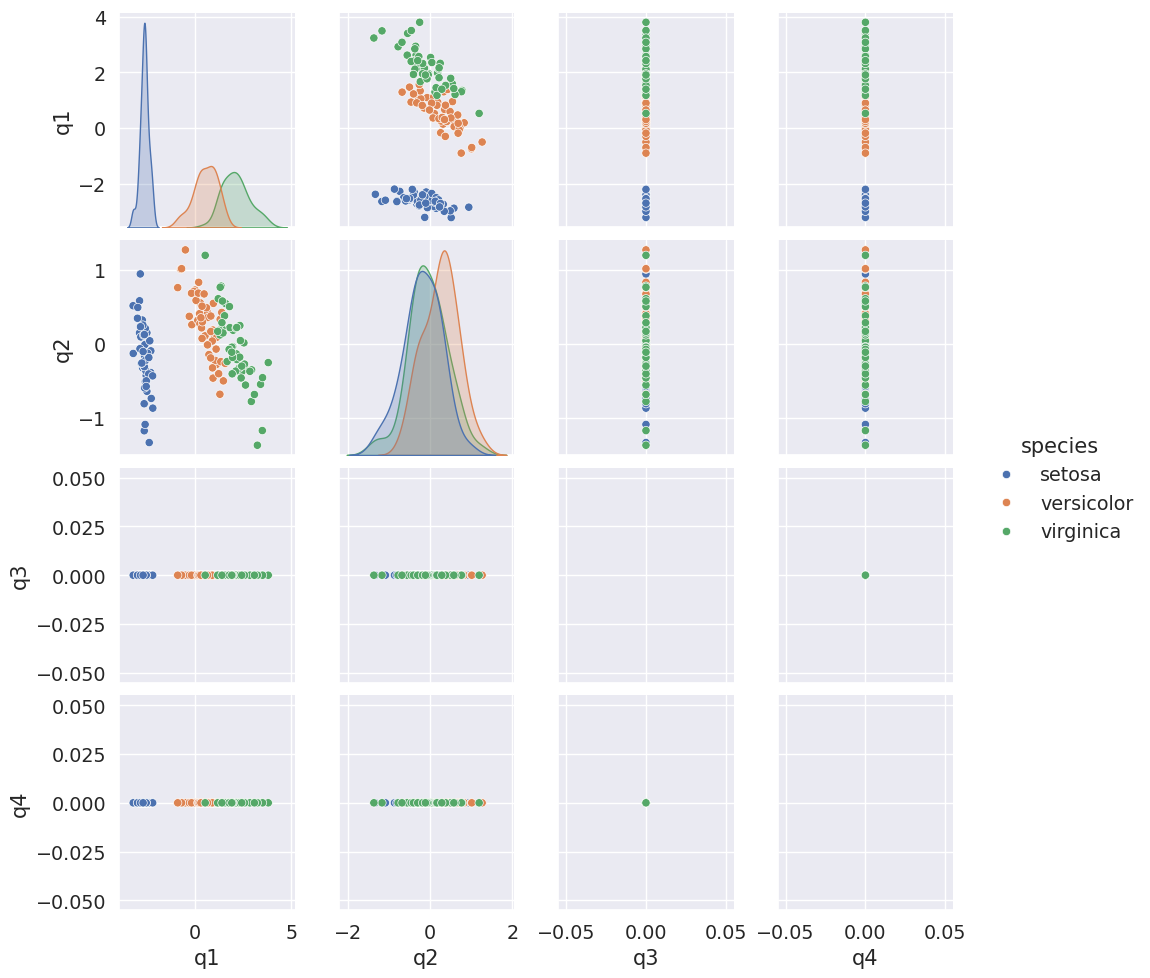

In [113]:
X2 = X @ Q @ np.diag([1, 1, 0, 0])
X2
X2_df = pd.DataFrame(X2)
X2_df.columns = ["q1", "q2", "q3", "q4"]
X2_df["species"] = iris_df["species"]
sns.pairplot(X2_df,hue='species')